In [1]:
import os
import csv

In [2]:
classes = os.listdir("C:/Users/Harahitha Divakar/Desktop/Final_year/codes/data")

In [3]:
csv_file = []
for c in classes : 
    new = os.listdir('C:/Users/Harahitha Divakar/Desktop/Final_year/codes/data/' + c)
    for n in new:
        new_tuple=(c,'C:/Users/Harahitha Divakar/Desktop/Final_year/codes/data/' +c+'/'+ n)
        csv_file.append(new_tuple)
print(csv_file[0])

('baby_laugh', 'C:/Users/Harahitha Divakar/Desktop/Final_year/codes/data/baby_laugh/laugh_1.m4a_0.wav')


In [4]:
''''with open('C:/Users/Harahitha Divakar/Desktop/Final_year/codes/metadata.csv','w', newline='') as file:
    writer=csv.writer(file)
    writer.writerow(['file_location','class'])
    for c in csv_file:
        writer.writerow([c[1],c[0]])'''

"'with open('C:/Users/Harahitha Divakar/Desktop/Final_year/codes/metadata.csv','w', newline='') as file:\n    writer=csv.writer(file)\n    writer.writerow(['file_location','class'])\n    for c in csv_file:\n        writer.writerow([c[1],c[0]])"

In [5]:
import pandas as pd
import numpy as np
import librosa
import os
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [6]:
meta = pd.read_csv('C:/Users/Harahitha Divakar/Desktop/Final_year/codes/metadata.csv')

In [7]:
meta.head()

,file_location,class
0,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh
1,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh
2,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh
3,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh
4,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh


In [8]:
file_name = meta.iloc[0][0]
print(file_name)

C:/Users/Harahitha Divakar/Desktop/Final_year/codes/data/baby_laugh/laugh_1.m4a_0.wav


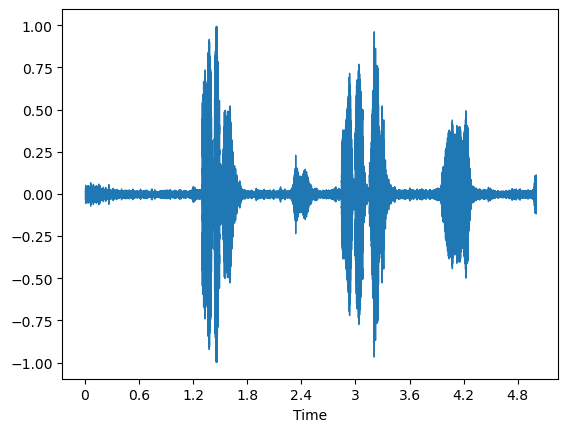

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [9]:
audio_data,sampling_rate= librosa.load(file_name)
librosa.display.waveshow(audio_data, sr = sampling_rate)
ipd.Audio(file_name)

In [10]:
meta['class'].value_counts()

baby_laugh    108
cry_baby      108
noise         108
Silence       108
Name: class, dtype: int64

In [11]:
mfccs = librosa.feature.mfcc(y =audio_data,sr =sampling_rate,n_mfcc=40)


In [12]:
mfccs_scaled_features = np.mean(mfccs.T,axis=0)
print(mfccs_scaled_features)

[-262.04272     100.39748      -3.8144314     8.0508375   -19.826376
   -0.49412304   -8.178548    -12.39265      -8.765902     -7.968674
  -10.168469     -6.519178     -6.6914206    -4.747753    -11.485994
  -12.911472    -13.314292     -8.559279    -10.745954     -4.7004566
   -5.5387807    -3.7838528    -5.810431     -1.9427518    -5.941757
   -4.720168     -6.165758     -5.047697     -6.873394     -3.4145167
   -7.1495047    -3.4435086    -5.501696     -4.4257092    -3.036863
   -1.0225407    -2.1743078    -1.0621002    -2.7530704    -1.1394807 ]


In [13]:
address_list = meta['file_location'].tolist()
features = []
for a in address_list:
    audio_data,sampling_rate = librosa.load(a)
    mfccs = librosa.feature.mfcc(y =audio_data,sr =sampling_rate,n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T,axis=0)
    features.append(mfccs_scaled_features)
    
    

In [14]:
meta['features'] = features

In [15]:
meta.head()

,file_location,class,features
0,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh,"[-262.04272, 100.39748, -3.8144314, 8.0508375,..."
1,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh,"[-258.65237, 101.49481, -3.0543513, 8.211484, ..."
2,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh,"[-426.79614, 104.76412, 7.831579, 2.1752896, -..."
3,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh,"[-417.70718, 105.26367, 4.4688773, -0.741063, ..."
4,C:/Users/Harahitha Divakar/Desktop/Final_year/...,baby_laugh,"[-417.42624, 106.11108, 4.4877434, -1.3323916,..."


In [16]:
meta_new = meta.drop('file_location', axis=1)

In [17]:
meta_new.head()

,class,features
0,baby_laugh,"[-262.04272, 100.39748, -3.8144314, 8.0508375,..."
1,baby_laugh,"[-258.65237, 101.49481, -3.0543513, 8.211484, ..."
2,baby_laugh,"[-426.79614, 104.76412, 7.831579, 2.1752896, -..."
3,baby_laugh,"[-417.70718, 105.26367, 4.4688773, -0.741063, ..."
4,baby_laugh,"[-417.42624, 106.11108, 4.4877434, -1.3323916,..."


In [18]:
X = np.array(meta_new['features'].tolist())
y= np.array(meta_new['class'].tolist())

In [38]:
meta.value_counts('class')

class
Silence       108
baby_laugh    108
cry_baby      108
noise         108
dtype: int64

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [20]:
y_new = []
for a in y:
    hey = np.ravel(a,order='C')
    y_new.append(hey)

In [21]:
y_new = np.array(y_new)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
X_train.shape, y_train.shape

((345, 40), (345, 4))

In [24]:
import tensorflow as tf


In [25]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [26]:
model = Sequential()

model.add(Dense(100,input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(4))
model.add(Activation('softmax'))

In [27]:
opt = Adam(learning_rate = 0.00001)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

In [29]:
num_epochs = 350
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, verbose=2,validation_split=0.2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/350
9/9 - 3s - loss: 1.6886 - accuracy: 0.2101 - val_loss: 1.3583 - val_accuracy: 0.2899 - 3s/epoch - 293ms/step
Epoch 2/350
9/9 - 0s - loss: 1.5516 - accuracy: 0.2572 - val_loss: 1.3414 - val_accuracy: 0.3913 - 162ms/epoch - 18ms/step
Epoch 3/350
9/9 - 0s - loss: 1.5609 - accuracy: 0.2645 - val_loss: 1.3034 - val_accuracy: 0.4058 - 162ms/epoch - 18ms/step
Epoch 4/350
9/9 - 0s - loss: 1.5479 - accuracy: 0.2319 - val_loss: 1.2511 - val_accuracy: 0.6377 - 158ms/epoch - 18ms/step
Epoch 5/350
9/9 - 0s - loss: 1.4448 - accuracy: 0.2971 - val_loss: 1.2117 - val_accuracy: 0.5942 - 158ms/epoch - 18ms/step
Epoch 6/350
9/9 - 0s - loss: 1.4004 - accuracy: 0.2971 - val_loss: 1.1753 - val_accuracy: 0.6232 - 148ms/epoch - 16ms/step
Epoch 7/350
9/9 - 0s - loss: 1.3895 - accuracy: 0.3080 - val_loss: 1.1226 - val_accuracy: 0.5942 - 117ms/epoch - 13ms/step
Epoch 8/350
9/9 - 0s - loss: 1.3129 - accuracy: 0.3478 - val_loss: 1.0730 - val_accuracy: 0.6087 - 124ms/epoch - 14ms/step
Epoch 9/350
9/9 - 

Epoch 68/350
9/9 - 0s - loss: 0.3978 - accuracy: 0.8587 - val_loss: 0.2220 - val_accuracy: 0.9420 - 91ms/epoch - 10ms/step
Epoch 69/350
9/9 - 0s - loss: 0.4038 - accuracy: 0.8551 - val_loss: 0.2165 - val_accuracy: 0.9275 - 87ms/epoch - 10ms/step
Epoch 70/350
9/9 - 0s - loss: 0.3862 - accuracy: 0.8514 - val_loss: 0.2105 - val_accuracy: 0.9275 - 88ms/epoch - 10ms/step
Epoch 71/350
9/9 - 0s - loss: 0.3560 - accuracy: 0.8841 - val_loss: 0.2062 - val_accuracy: 0.9275 - 94ms/epoch - 10ms/step
Epoch 72/350
9/9 - 0s - loss: 0.3521 - accuracy: 0.8623 - val_loss: 0.2023 - val_accuracy: 0.9275 - 85ms/epoch - 9ms/step
Epoch 73/350
9/9 - 0s - loss: 0.3045 - accuracy: 0.8804 - val_loss: 0.2046 - val_accuracy: 0.9275 - 80ms/epoch - 9ms/step
Epoch 74/350
9/9 - 0s - loss: 0.3011 - accuracy: 0.9094 - val_loss: 0.2057 - val_accuracy: 0.9420 - 84ms/epoch - 9ms/step
Epoch 75/350
9/9 - 0s - loss: 0.2959 - accuracy: 0.8986 - val_loss: 0.2087 - val_accuracy: 0.9420 - 69ms/epoch - 8ms/step
Epoch 76/350
9/9 - 0

Epoch 135/350
9/9 - 0s - loss: 0.1295 - accuracy: 0.9529 - val_loss: 0.1235 - val_accuracy: 0.9565 - 114ms/epoch - 13ms/step
Epoch 136/350
9/9 - 0s - loss: 0.1144 - accuracy: 0.9638 - val_loss: 0.1210 - val_accuracy: 0.9420 - 155ms/epoch - 17ms/step
Epoch 137/350
9/9 - 0s - loss: 0.1174 - accuracy: 0.9601 - val_loss: 0.1190 - val_accuracy: 0.9565 - 93ms/epoch - 10ms/step
Epoch 138/350
9/9 - 0s - loss: 0.1434 - accuracy: 0.9601 - val_loss: 0.1194 - val_accuracy: 0.9565 - 85ms/epoch - 9ms/step
Epoch 139/350
9/9 - 0s - loss: 0.1160 - accuracy: 0.9674 - val_loss: 0.1146 - val_accuracy: 0.9565 - 97ms/epoch - 11ms/step
Epoch 140/350
9/9 - 0s - loss: 0.0995 - accuracy: 0.9710 - val_loss: 0.1090 - val_accuracy: 0.9565 - 101ms/epoch - 11ms/step
Epoch 141/350
9/9 - 0s - loss: 0.1489 - accuracy: 0.9493 - val_loss: 0.1091 - val_accuracy: 0.9710 - 105ms/epoch - 12ms/step
Epoch 142/350
9/9 - 0s - loss: 0.1254 - accuracy: 0.9638 - val_loss: 0.1116 - val_accuracy: 0.9565 - 104ms/epoch - 12ms/step
Epoc

Epoch 201/350
9/9 - 0s - loss: 0.0354 - accuracy: 0.9928 - val_loss: 0.1393 - val_accuracy: 0.9710 - 65ms/epoch - 7ms/step
Epoch 202/350
9/9 - 0s - loss: 0.0435 - accuracy: 0.9855 - val_loss: 0.1430 - val_accuracy: 0.9710 - 78ms/epoch - 9ms/step
Epoch 203/350
9/9 - 0s - loss: 0.0611 - accuracy: 0.9746 - val_loss: 0.1611 - val_accuracy: 0.9710 - 68ms/epoch - 8ms/step
Epoch 204/350
9/9 - 0s - loss: 0.0404 - accuracy: 0.9891 - val_loss: 0.1835 - val_accuracy: 0.9710 - 72ms/epoch - 8ms/step
Epoch 205/350
9/9 - 0s - loss: 0.0950 - accuracy: 0.9638 - val_loss: 0.1826 - val_accuracy: 0.9710 - 80ms/epoch - 9ms/step
Epoch 206/350
9/9 - 0s - loss: 0.0527 - accuracy: 0.9891 - val_loss: 0.1823 - val_accuracy: 0.9710 - 72ms/epoch - 8ms/step
Epoch 207/350
9/9 - 0s - loss: 0.0516 - accuracy: 0.9855 - val_loss: 0.1783 - val_accuracy: 0.9710 - 75ms/epoch - 8ms/step
Epoch 208/350
9/9 - 0s - loss: 0.0489 - accuracy: 0.9855 - val_loss: 0.1847 - val_accuracy: 0.9710 - 74ms/epoch - 8ms/step
Epoch 209/350
9/

Epoch 267/350
9/9 - 0s - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.2014 - val_accuracy: 0.9710 - 100ms/epoch - 11ms/step
Epoch 268/350
9/9 - 0s - loss: 0.0484 - accuracy: 0.9819 - val_loss: 0.2004 - val_accuracy: 0.9710 - 102ms/epoch - 11ms/step
Epoch 269/350
9/9 - 0s - loss: 0.0306 - accuracy: 0.9928 - val_loss: 0.1830 - val_accuracy: 0.9710 - 103ms/epoch - 11ms/step
Epoch 270/350
9/9 - 0s - loss: 0.0528 - accuracy: 0.9819 - val_loss: 0.1596 - val_accuracy: 0.9710 - 105ms/epoch - 12ms/step
Epoch 271/350
9/9 - 0s - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.1639 - val_accuracy: 0.9710 - 176ms/epoch - 20ms/step
Epoch 272/350
9/9 - 0s - loss: 0.0564 - accuracy: 0.9891 - val_loss: 0.1841 - val_accuracy: 0.9710 - 167ms/epoch - 19ms/step
Epoch 273/350
9/9 - 0s - loss: 0.0280 - accuracy: 0.9928 - val_loss: 0.1988 - val_accuracy: 0.9710 - 153ms/epoch - 17ms/step
Epoch 274/350
9/9 - 0s - loss: 0.0307 - accuracy: 0.9891 - val_loss: 0.1982 - val_accuracy: 0.9710 - 160ms/epoch - 18ms/step


Epoch 333/350
9/9 - 0s - loss: 0.0380 - accuracy: 0.9855 - val_loss: 0.1443 - val_accuracy: 0.9710 - 166ms/epoch - 18ms/step
Epoch 334/350
9/9 - 0s - loss: 0.0167 - accuracy: 0.9928 - val_loss: 0.1402 - val_accuracy: 0.9710 - 105ms/epoch - 12ms/step
Epoch 335/350
9/9 - 0s - loss: 0.0276 - accuracy: 0.9928 - val_loss: 0.1388 - val_accuracy: 0.9710 - 114ms/epoch - 13ms/step
Epoch 336/350
9/9 - 0s - loss: 0.0146 - accuracy: 0.9964 - val_loss: 0.1356 - val_accuracy: 0.9710 - 104ms/epoch - 12ms/step
Epoch 337/350
9/9 - 0s - loss: 0.0158 - accuracy: 0.9928 - val_loss: 0.1441 - val_accuracy: 0.9565 - 115ms/epoch - 13ms/step
Epoch 338/350
9/9 - 0s - loss: 0.0193 - accuracy: 0.9855 - val_loss: 0.1648 - val_accuracy: 0.9565 - 106ms/epoch - 12ms/step
Epoch 339/350
9/9 - 0s - loss: 0.0408 - accuracy: 0.9855 - val_loss: 0.1675 - val_accuracy: 0.9565 - 116ms/epoch - 13ms/step
Epoch 340/350
9/9 - 0s - loss: 0.0149 - accuracy: 0.9964 - val_loss: 0.1496 - val_accuracy: 0.9710 - 108ms/epoch - 12ms/step


In [30]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.954023003578186


In [31]:
filename='C:/Users/Harahitha Divakar/Desktop/Final_year/codes/data_new/val/cry_baby/Louise_01.m4a_9.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-2.3344270e+02  1.7966623e+01 -4.7415276e+01  1.2502570e+01
 -1.8385271e+01 -1.8280947e+00 -9.7920294e+00 -2.6014004e+00
 -2.3397560e+01  2.3275881e+00 -4.2746508e-01 -1.5956515e+00
  3.6759546e-01  1.3641034e+01 -4.8137479e+00  1.5024717e+01
 -1.5386454e+00  7.7466950e+00 -6.0241570e+00  3.7696748e+00
 -1.3022316e+00 -3.7366955e+00 -8.6535759e+00 -7.7588239e+00
 -2.0559354e+00  8.4055585e-01 -5.4057517e+00 -3.4961746e+00
  6.6992384e-01  3.6074569e+00 -1.9268844e+00  1.2648165e-01
  6.6549325e-01  2.7997587e+00 -6.8853480e-01 -1.1486979e-01
  2.2676258e+00 -8.4062392e-01 -5.6421345e-01  1.7983366e+00]
[[-2.3344270e+02  1.7966623e+01 -4.7415276e+01  1.2502570e+01
  -1.8385271e+01 -1.8280947e+00 -9.7920294e+00 -2.6014004e+00
  -2.3397560e+01  2.3275881e+00 -4.2746508e-01 -1.5956515e+00
   3.6759546e-01  1.3641034e+01 -4.8137479e+00  1.5024717e+01
  -1.5386454e+00  7.7466950e+00 -6.0241570e+00  3.7696748e+00
  -1.3022316e+00 -3.7366955e+00 -8.6535759e+00 -7.7588239e+00
  -2.0559354e+00 

array(['cry_baby'], dtype='<U10')

In [32]:
model.save('C:/Users/Harahitha Divakar/Desktop/Final_year/codes/')

INFO:tensorflow:Assets written to: C:/Users/Harahitha Divakar/Desktop/Final_year/codes/assets


INFO:tensorflow:Assets written to: C:/Users/Harahitha Divakar/Desktop/Final_year/codes/assets


In [33]:
from tensorflow import keras
model = keras.models.load_model('C:/Users/Harahitha Divakar/Desktop/Final_year/codes/')

In [34]:
filename='C:/Users/Harahitha Divakar/Desktop/Final_year/codes/data_new/val/cry_baby/Louise_01.m4a_9.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-2.3344270e+02  1.7966623e+01 -4.7415276e+01  1.2502570e+01
 -1.8385271e+01 -1.8280947e+00 -9.7920294e+00 -2.6014004e+00
 -2.3397560e+01  2.3275881e+00 -4.2746508e-01 -1.5956515e+00
  3.6759546e-01  1.3641034e+01 -4.8137479e+00  1.5024717e+01
 -1.5386454e+00  7.7466950e+00 -6.0241570e+00  3.7696748e+00
 -1.3022316e+00 -3.7366955e+00 -8.6535759e+00 -7.7588239e+00
 -2.0559354e+00  8.4055585e-01 -5.4057517e+00 -3.4961746e+00
  6.6992384e-01  3.6074569e+00 -1.9268844e+00  1.2648165e-01
  6.6549325e-01  2.7997587e+00 -6.8853480e-01 -1.1486979e-01
  2.2676258e+00 -8.4062392e-01 -5.6421345e-01  1.7983366e+00]
[[-2.3344270e+02  1.7966623e+01 -4.7415276e+01  1.2502570e+01
  -1.8385271e+01 -1.8280947e+00 -9.7920294e+00 -2.6014004e+00
  -2.3397560e+01  2.3275881e+00 -4.2746508e-01 -1.5956515e+00
   3.6759546e-01  1.3641034e+01 -4.8137479e+00  1.5024717e+01
  -1.5386454e+00  7.7466950e+00 -6.0241570e+00  3.7696748e+00
  -1.3022316e+00 -3.7366955e+00 -8.6535759e+00 -7.7588239e+00
  -2.0559354e+00 

array(['cry_baby'], dtype='<U10')

In [37]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
